## First let's understand our tables. All is pretty clear except of "winner" column in games.csv, so lets figure out what that is:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Load the CSV file into a DataFrame
df = pd.read_csv('scrabble-player-rating/turns.csv')
df2 = pd.read_csv('scrabble-player-rating/games.csv')

for i in range(1, 10):
    # Filter rows where game_id is i
    filtered_df = df[df['game_id'] == i]
    max_score_row = filtered_df.loc[filtered_df['score'].idxmax()]

    # Extract nickname and score
    nickname = max_score_row['nickname']
    score = max_score_row['score']

    game_row = df2[df2['game_id'] == i]
    game_result = game_row['winner'].iloc[0]

    print(f"Nickname: {nickname}, Score: {score}, result: {game_result}")

Nickname: stevy, Score: 429, result: 1
Nickname: Super, Score: 488, result: 1
Nickname: davidavid, Score: 440, result: 1
Nickname: BetterBot, Score: 478, result: 0
Nickname: STEEBot, Score: 427, result: 0
Nickname: STEEBot, Score: 427, result: 0
Nickname: Priya1, Score: 379, result: 1
Nickname: HastyBot, Score: 528, result: 0
Nickname: BetterBot, Score: 464, result: 0


### It is pretty clear from here that "1" means victory for the player, "0" means victory for the bot. Since this is pretty stupid I'll add a column of the player name in games.csv

In [12]:
# Load the CSV files into DataFrames
games_df = pd.read_csv('scrabble-player-rating/games.csv')
turns_df = pd.read_csv('scrabble-player-rating/turns.csv')

# Initialize new columns in games_df
games_df['bot_username'] = None
games_df['player_username'] = None

# List of bot names
bot_names = {'BetterBot', 'STEEBot', 'HastyBot'}

# Iterate over each game_id in games_df
for index, row in games_df.iterrows():
    game_id = row['game_id']
    
    # Get the first two rows for the current game_id from turns_df
    filtered_turns = turns_df[turns_df['game_id'] == game_id].head(2)
    
    # Extract nicknames
    nicknames = filtered_turns['nickname'].tolist()
    # Identify the bot and player usernames
    if nicknames[0] in bot_names:
        bot_username = nicknames[0]
        player_username = nicknames[1]
    else:
        bot_username = nicknames[1]
        player_username = nicknames[0]
    # bot_username = next(name for name in nicknames if name in bot_names)
    # player_username = next(name for name in nicknames if name not in bot_names)

    # Assign to the games_df
    games_df.at[index, 'bot_username'] = bot_username
    games_df.at[index, 'player_username'] = player_username

# # # Save the updated DataFrame to a new CSV
games_df.to_csv('scrabble-player-rating/updated_games.csv', index=False)

print("Updated games.csv with bot and player usernames.")


# Let's start by taking a general look at our data

## How many games have our players played?

In [31]:
df = pd.read_csv('scrabble-player-rating/updated_games.csv')

username_counts = df['player_username'].value_counts()

# Display the result
print(username_counts)
top_100_players = username_counts.head(20)
# print(top_100_players)
# print(f"Player Count: {len(username_counts)}")

player_username
BB-8            6576
hannahbanana    1884
pandorable      1759
marvin          1233
Eloquent        1041
                ... 
jolinn             1
groveringu         1
Supphakrit         1
A.Hanafi           1
kacattac           1
Name: count, Length: 1469, dtype: int64


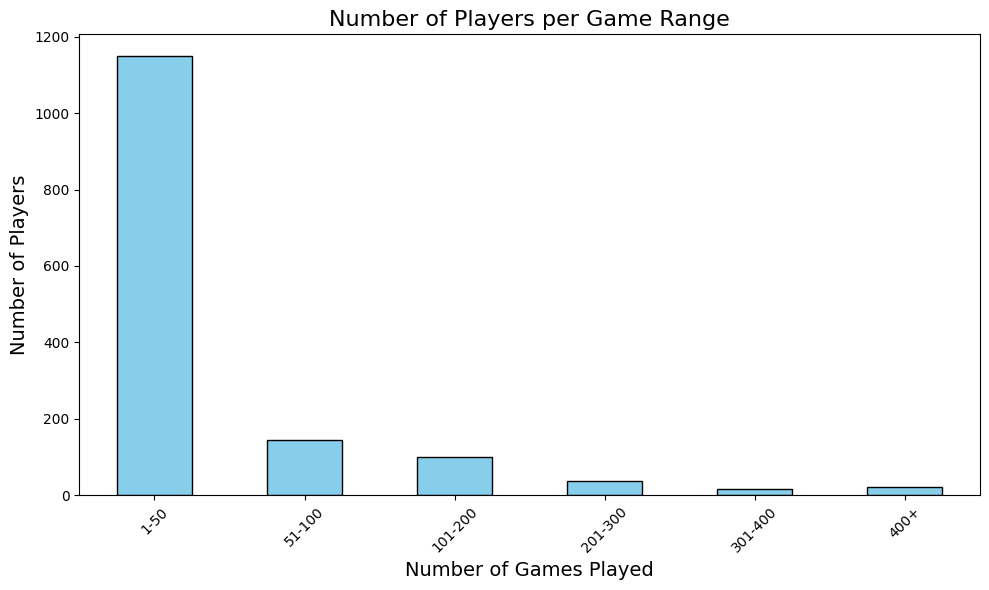

In [34]:
# Load the updated games.csv file
games_df = pd.read_csv('scrabble-player-rating/updated_games.csv')

# Count the number of games per username
username_counts = games_df['player_username'].value_counts()

# Define bins for the histogram
bins = [1, 50, 100, 200, 300, 400, username_counts.max()]

# Create labels for the bins
labels = ['1-50', '51-100', '101-200', '201-300', '301-400', '400+']

# Bin the counts
username_counts_binned = pd.cut(username_counts, bins=bins, labels=labels, right=False)

# Count the number of players in each bin
histogram_data = username_counts_binned.value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
histogram_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Players per Game Range', fontsize=16)
plt.xlabel('Number of Games Played', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### This is quite intresting- most players did not do many games at all. But comparing 50 to 1 is unfair, so lets dig deeper:

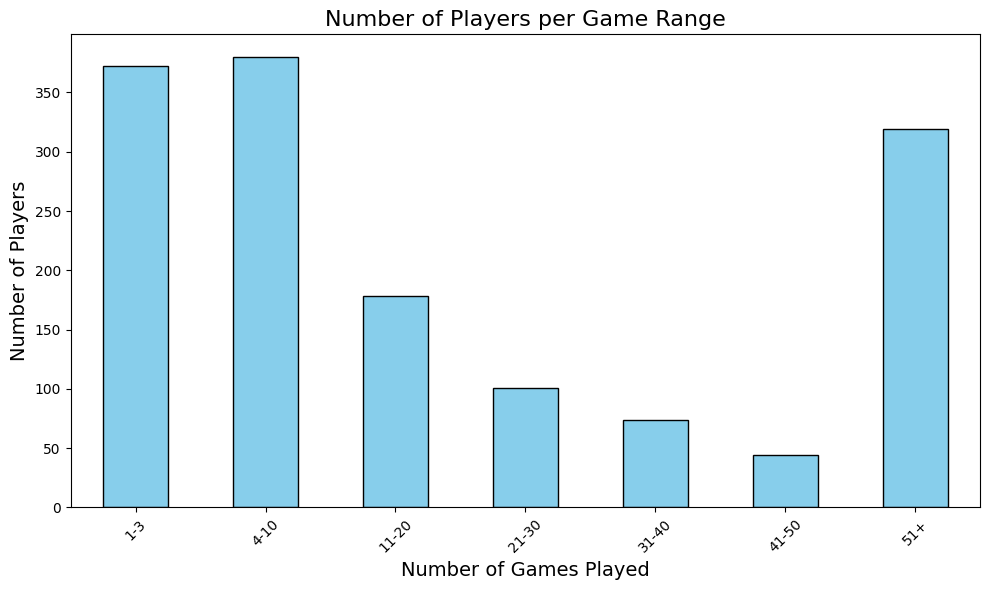

In [41]:
# Load the updated games.csv file
games_df = pd.read_csv('scrabble-player-rating/updated_games.csv')

# Count the number of games per username
username_counts = games_df['player_username'].value_counts()

# Define bins for the histogram
bins = [1, 3, 10, 20, 30, 40, 50, username_counts.max()]

# Create labels for the bins
labels = ['1-3', '4-10', '11-20', '21-30', '31-40', '41-50', '51+']

# Bin the counts
username_counts_binned = pd.cut(username_counts, bins=bins, labels=labels, right=False)

# Count the number of players in each bin
histogram_data = username_counts_binned.value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
histogram_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Players per Game Range', fontsize=16)
plt.xlabel('Number of Games Played', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## More graphs on our data:

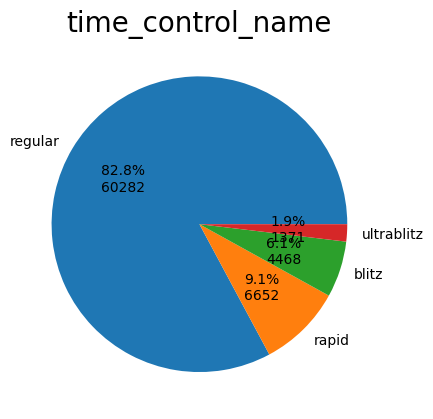

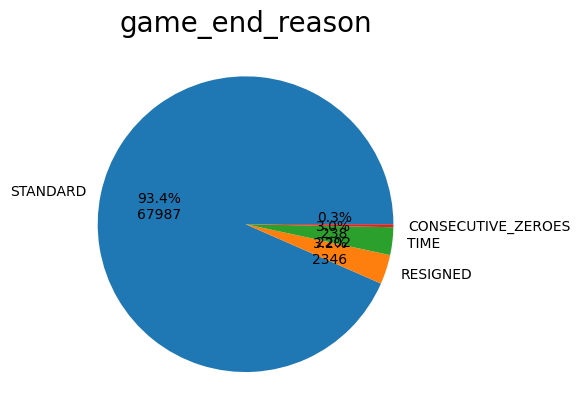

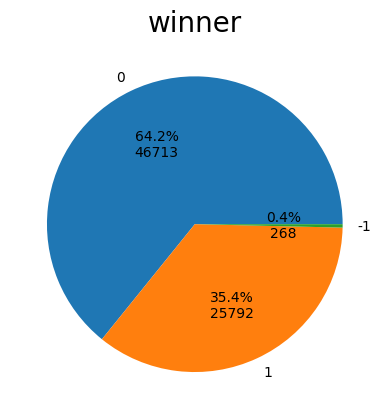

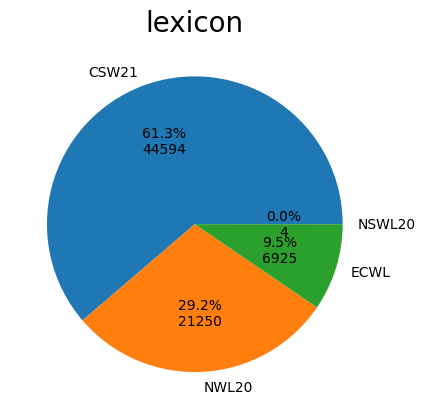

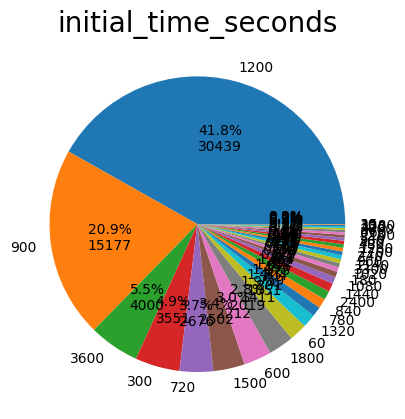

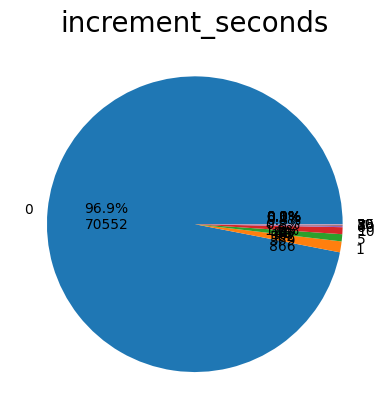

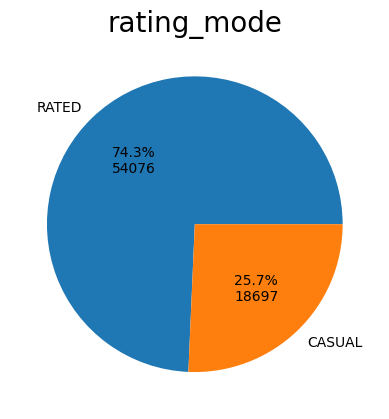

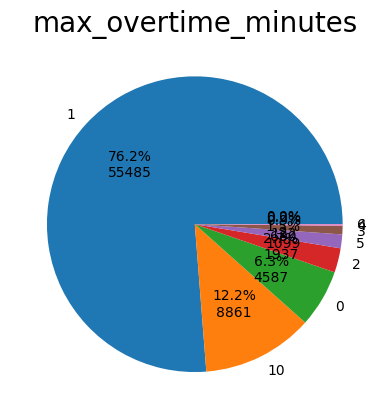

In [40]:
col_names = ['game_id','first','time_control_name','game_end_reason','winner','created_at','lexicon','initial_time_seconds','increment_seconds','rating_mode','max_overtime_minutes','game_duration_seconds']	

#on the categorial data we will make pie graphs:
col_names_pie = ['time_control_name','game_end_reason','winner','lexicon','initial_time_seconds','increment_seconds','rating_mode','max_overtime_minutes']
df =  pd.read_csv('scrabble-player-rating/games.csv')
plots = []
for col_name in col_names_pie:
    total = df[col_name].value_counts().values.sum()
    def fmt(x):
        return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
    
    plt.pie(df[col_name].value_counts().values, labels=df[col_name].value_counts().index, autopct=fmt)
    plt.title(label=col_name,
          fontsize=20,
          )
    plt.show()


### Hypothesis: More games are correlated to higher rating- makes sense since they will be more experienced. Let's check it out:

In [57]:
train_df = pd.read_csv('scrabble-player-rating/train.csv')

#remvoing duplicates and other columns aside from name and rating:
filtered_train_df = train_df.drop_duplicates('nickname').drop(columns = ['game_id','score']) 

#removing the bots- they are not players!
bot_names = {'BetterBot', 'STEEBot', 'HastyBot'}
filtered_train_df = filtered_train_df[~filtered_train_df['nickname'].isin(bot_names)]

print(filtered_train_df)

              nickname  rating
1                stevy    1500
2            davidavid    1811
4       Inandoutworker    1473
8               HivinD    2029
11          AliSalman1    2067
...                ...     ...
98839             swee    1438
98902             Marc    1950
99403       Supphakrit    2056
100076        A.Hanafi    1837
100354        kacattac    2017

[1028 rows x 2 columns]


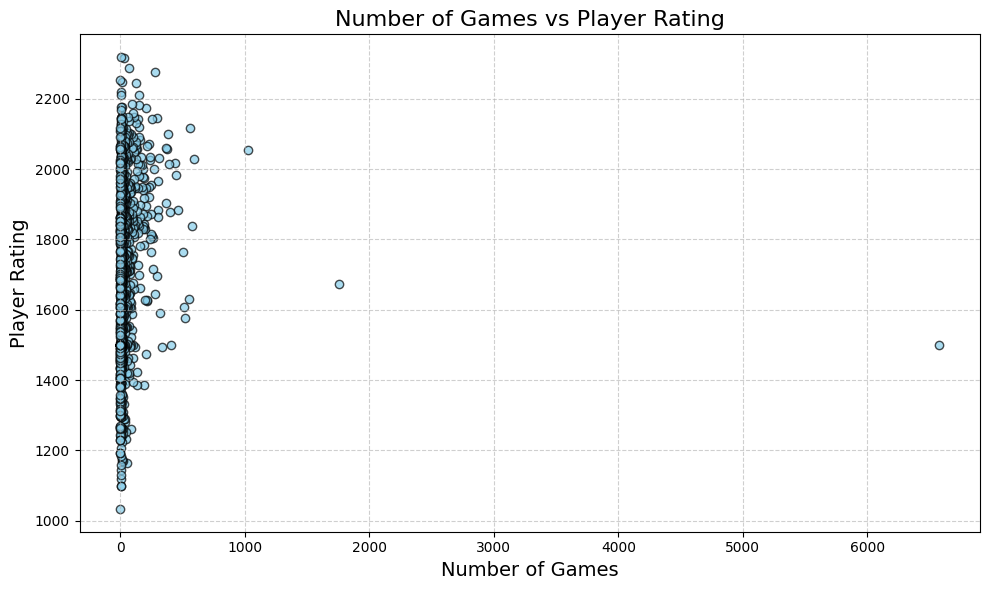

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load games.csv and calculate number of games per player
games_df = pd.read_csv('scrabble-player-rating/updated_games.csv')
username_counts = games_df['player_username'].value_counts().reset_index()
username_counts.columns = ['nickname', 'num_games']  # Rename columns for clarity

# Load train.csv and filter for unique nicknames and ratings
train_df = pd.read_csv('scrabble-player-rating/train.csv')
filtered_train_df = train_df.drop_duplicates('nickname').drop(columns=['game_id', 'score'])

# Remove bot usernames
bot_names = {'BetterBot', 'STEEBot', 'HastyBot'}
filtered_train_df = filtered_train_df[~filtered_train_df['nickname'].isin(bot_names)]

# Merge the two datasets on 'nickname'
merged_df = pd.merge(username_counts, filtered_train_df, on='nickname', how='inner')

# Plot the relationship between number of games and rating
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['num_games'], merged_df['rating'], alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Number of Games vs Player Rating', fontsize=16)
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Player Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


### Data is squished due to outliers- let's apply log to spread it out more:

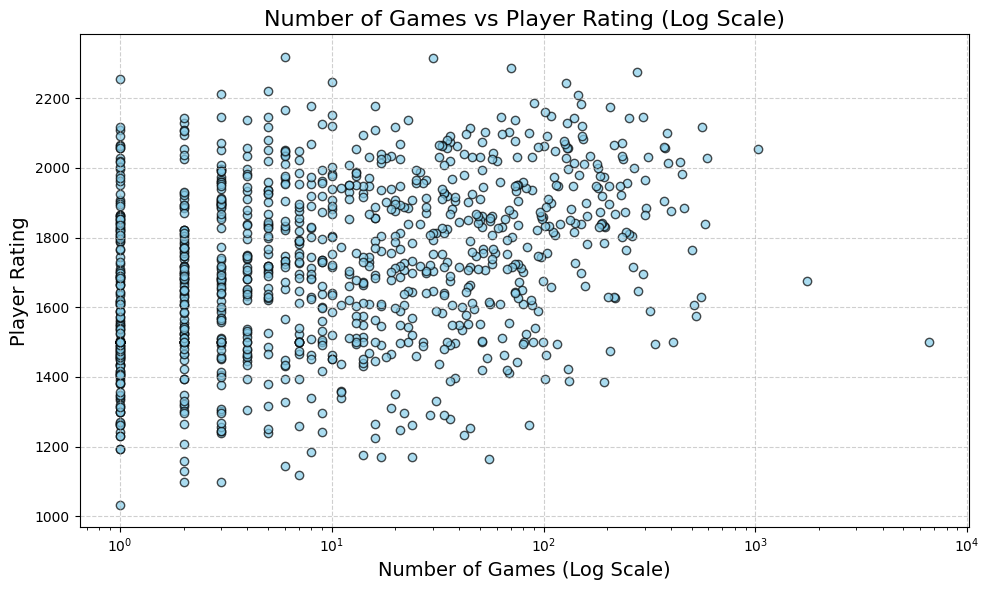

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load games.csv and calculate number of games per player
games_df = pd.read_csv('scrabble-player-rating/updated_games.csv')
username_counts = games_df['player_username'].value_counts().reset_index()
username_counts.columns = ['nickname', 'num_games']  # Rename columns for clarity

# Load train.csv and filter for unique nicknames and ratings
train_df = pd.read_csv('scrabble-player-rating/train.csv')
filtered_train_df = train_df.drop_duplicates('nickname').drop(columns=['game_id', 'score'])

# Remove bot usernames
bot_names = {'BetterBot', 'STEEBot', 'HastyBot'}
filtered_train_df = filtered_train_df[~filtered_train_df['nickname'].isin(bot_names)]

# Merge the two datasets on 'nickname'
merged_df = pd.merge(username_counts, filtered_train_df, on='nickname', how='inner')

# Plot the relationship between number of games and rating with a logarithmic x-axis
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['num_games'], merged_df['rating'], alpha=0.7, color='skyblue', edgecolor='black')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Number of Games vs Player Rating (Log Scale)', fontsize=16)
plt.xlabel('Number of Games (Log Scale)', fontsize=14)
plt.ylabel('Player Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


### Surprisingly- not much correlation at all!

## Hypothesos: Higher average score per game will give us higher rating

In [66]:
# Load the updated_games.csv and train.csv files
games_df = pd.read_csv('scrabble-player-rating/updated_games.csv')
train_df = pd.read_csv('scrabble-player-rating/train.csv')

# Remove duplicates to get a single rating per player
ratings_df = train_df.drop_duplicates('nickname')[['nickname', 'rating']]

# Merge games_df with ratings_df on player_username and nickname
games_with_ratings_df = pd.merge(
    games_df,
    ratings_df,
    left_on='player_username',
    right_on='nickname',
    how='left'  # Use 'left' join to keep all rows in games_df
)

# Drop the redundant 'nickname' column from the merged DataFrame
games_with_ratings_df = games_with_ratings_df.drop(columns=['nickname'])

# Save or display the resulting DataFrame
print(games_with_ratings_df.head())  # Display the first few rows
games_with_ratings_df.to_csv('scrabble-player-rating/games_with_ratings.csv', index=False)


   game_id      first time_control_name game_end_reason  winner  \
0        1  BetterBot           regular        STANDARD       1   
1        2      Super           regular        STANDARD       1   
2        3  BetterBot           regular        STANDARD       1   
3        4  BetterBot           regular        RESIGNED       0   
4        5    STEEBot           regular        STANDARD       0   

            created_at lexicon  initial_time_seconds  increment_seconds  \
0  2022-08-26 03:38:49   NWL20                  1200                  0   
1  2022-08-10 19:19:59   CSW21                  3600                  0   
2  2022-09-04 08:04:27   CSW21                   900                  0   
3  2022-09-12 02:36:19   CSW21                  3600                  0   
4  2022-09-06 04:31:36   NWL20                  1200                  0   

  rating_mode  max_overtime_minutes  game_duration_seconds bot_username  \
0      CASUAL                     1             674.844274    BetterBot

In [67]:
# Load the turns.csv and games.csv files
turns_df = pd.read_csv('scrabble-player-rating/turns.csv')
games_df = pd.read_csv('scrabble-player-rating/updated_games.csv')

# Define the set of bot names
bot_names = {'BetterBot', 'STEEBot', 'HastyBot'}

# Filter for rows where the nickname is not a bot
player_turns = turns_df[~turns_df['nickname'].isin(bot_names)]

# Find the last turn for each game by player
player_final_scores = (
    player_turns.groupby('game_id')
    .last()[['nickname', 'score']]
    .reset_index()
)

# Rename columns for clarity
player_final_scores = player_final_scores.rename(columns={
    'nickname': 'player_username',
    'score': 'final_score'
})

# Merge the final scores into games.csv
games_with_scores_df = pd.merge(
    games_df,
    player_final_scores[['game_id', 'final_score']],
    on='game_id',
    how='left'
)

# Save the updated games.csv
games_with_scores_df.to_csv('scrabble-player-rating/games_with_final_scores.csv', index=False)

   game_id      first time_control_name game_end_reason  winner  \
0        1  BetterBot           regular        STANDARD       1   
1        2      Super           regular        STANDARD       1   
2        3  BetterBot           regular        STANDARD       1   
3        4  BetterBot           regular        RESIGNED       0   
4        5    STEEBot           regular        STANDARD       0   

            created_at lexicon  initial_time_seconds  increment_seconds  \
0  2022-08-26 03:38:49   NWL20                  1200                  0   
1  2022-08-10 19:19:59   CSW21                  3600                  0   
2  2022-09-04 08:04:27   CSW21                   900                  0   
3  2022-09-12 02:36:19   CSW21                  3600                  0   
4  2022-09-06 04:31:36   NWL20                  1200                  0   

  rating_mode  max_overtime_minutes  game_duration_seconds bot_username  \
0      CASUAL                     1             674.844274    BetterBot

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

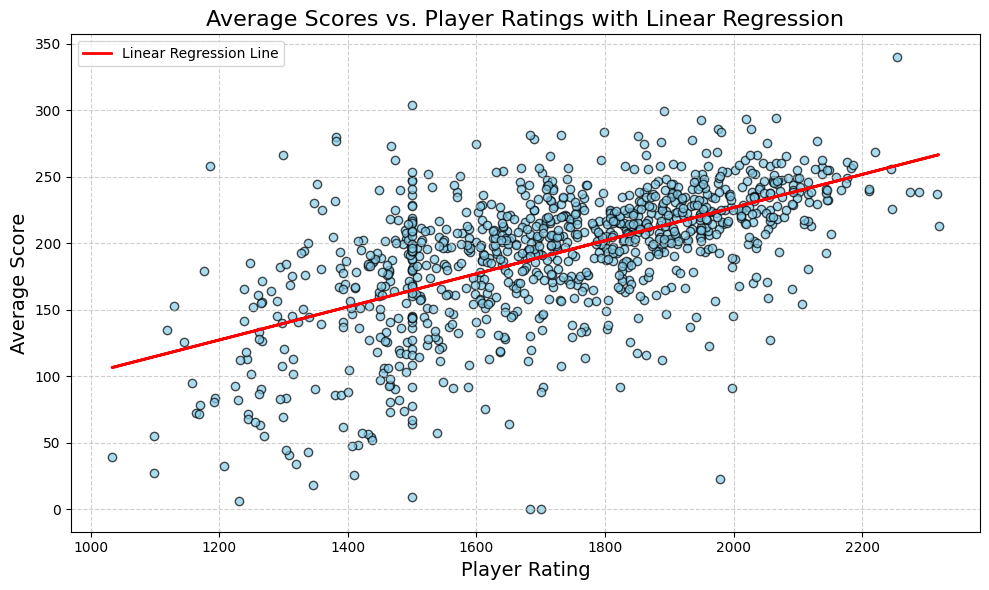

In [4]:
# Load the necessary files
turns_df = pd.read_csv('scrabble-player-rating/turns.csv')
train_df = pd.read_csv('scrabble-player-rating/train.csv')

# Define the set of bot names
bot_names = {'BetterBot', 'STEEBot', 'HastyBot'}

# Filter out bot nicknames
player_turns = turns_df[~turns_df['nickname'].isin(bot_names)]

# Compute the average score for each player
average_scores = player_turns.groupby('nickname')['score'].mean().reset_index()
average_scores = average_scores.rename(columns={'score': 'average_score'})

# Remove duplicates and extract ratings from train.csv
player_ratings = train_df.drop_duplicates('nickname')[['nickname', 'rating']]

# Merge average scores with ratings
player_data = pd.merge(average_scores, player_ratings, on='nickname', how='inner')

# Prepare data for linear regression
X = player_data[['rating']]  # Independent variable (player ratings)
y = player_data['average_score']  # Dependent variable (average scores)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values from the model
y_pred = model.predict(X)

# Plot average scores vs. ratings
plt.figure(figsize=(10, 6))
plt.scatter(player_data['rating'], player_data['average_score'], alpha=0.7, color='skyblue', edgecolor='black')

# Plot the regression line
plt.plot(player_data['rating'], y_pred, color='red', linewidth=2, label='Linear Regression Line')

# Title and labels
plt.title('Average Scores vs. Player Ratings with Linear Regression', fontsize=16)
plt.xlabel('Player Rating', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [8]:
# Load the necessary files
df_with_scores = pd.read_csv('scrabble-player-rating/games_with_final_scores.csv')
df_with_ratings = pd.read_csv('scrabble-player-rating/games_with_ratings.csv')

score_col = df_with_scores['final_score']
df_with_ratings.join(score_col)
games_with_score_and_rating = df_with_ratings.join(score_col)

# Save or display the resulting DataFrame
games_with_score_and_rating.to_csv('scrabble-player-rating/games_with_score_and_rating.csv', index=False)

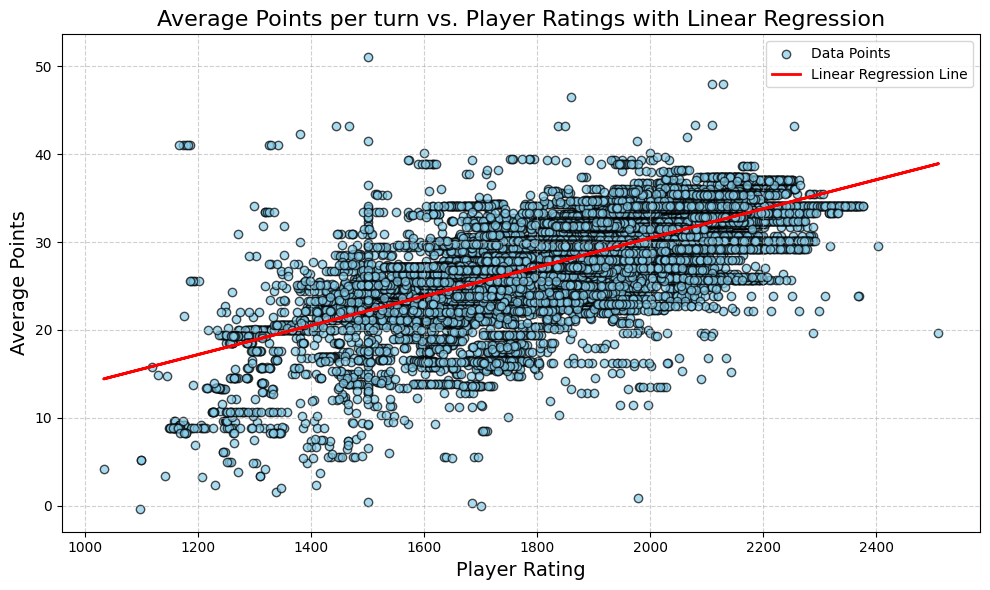

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the datasets
turns_df = pd.read_csv('scrabble-player-rating/turns.csv')
train_df = pd.read_csv('scrabble-player-rating/train.csv')

# Compute average points and minimum score for each player
new = turns_df.groupby('nickname').agg(
    avg_points=pd.NamedAgg(column="points", aggfunc="mean"),
    score=pd.NamedAgg(column="score", aggfunc="min")
)

# Remove duplicates and keep only nickname and rating from train.csv
train_ratings = train_df[['nickname', 'rating']].drop_duplicates()

# Merge the ratings into the `new` DataFrame
new_with_ratings = pd.merge(new, train_ratings, on='nickname', how='left')

# Drop rows where `rating` is NaN (optional, for scatterplot purposes)
new_with_ratings_clean = new_with_ratings.dropna(subset=['rating'])

# Prepare data for linear regression
X = new_with_ratings_clean[['rating']]  # Independent variable (player ratings)
y = new_with_ratings_clean['avg_points']  # Dependent variable (average points)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values from the model
y_pred = model.predict(X)

# Scatterplot between average points and ratings
plt.figure(figsize=(10, 6))
plt.scatter(new_with_ratings_clean['rating'], new_with_ratings_clean['avg_points'], alpha=0.7, color='skyblue', edgecolor='black', label='Data Points')

# Plot the regression line
plt.plot(new_with_ratings_clean['rating'], y_pred, color='red', linewidth=2, label='Linear Regression Line')

# Title and labels
plt.title('Average Points per turn vs. Player Ratings with Linear Regression', fontsize=16)
plt.xlabel('Player Rating', fontsize=14)
plt.ylabel('Average Points', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
